In [35]:
import pandas as pd
import seaborn as sns

### Adatok beolvasása

In [2]:
file_path = 'SBAnational.csv'
column_names = [
    'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
    'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
    'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
    'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'
]
column_types = {
    'ApprovalFY': str
}

df_sba = pd.read_csv(file_path, skiprows=[0], header=None, names=column_names, dtype=column_types)
print(df_sba.head())

   LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  Disbu

In [3]:
df_sba.shape

(899164, 27)

In [4]:
def describe_data(df):
    print(len(df_sba))
    column=[]
    d_type=[]
    uniques=[]
    n_uniques=[]
    nan=[]
    d_min=[]
    d_max=[]

    for i in df.columns:
        column.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        nan.append(df[i].isna().sum()/len(df)*100)
        if df[i].dtype != 'object':
            d_min.append(df[i].min())
        else:
            d_min.append(None)
        if df[i].dtype != 'object':
            d_max.append(df[i].max())
        else:
            d_max.append(None)

    return pd.DataFrame({'Column': column, 'type': d_type, 'unique sample': uniques, 'uniques': n_uniques, 'NaN%': nan, 'Min': d_min, 'Max': d_max})

old_data_len=len(df_sba)
describe_data(df_sba)

899164


,Column,type,unique sample,uniques,NaN%,Min,Max
0,LoanNr_ChkDgt,int64,"[1000014003, 1000024006, 1000034009, 100004400...",899164,0.000000,1.000014e+09,9.996003e+09
1,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",779583,0.001557,NaN,NaN
2,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32581,0.003336,NaN,NaN
3,State,object,"[IN, OK, FL, CT, NJ]",51,0.001557,NaN,NaN
4,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33611,0.000000,0.000000e+00,9.999900e+04
5,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5802,0.173383,NaN,NaN
6,BankState,object,"[OH, IN, OK, FL, DE]",56,0.174162,NaN,NaN
7,NAICS,int64,"[451120, 722410, 621210, 0, 332721]",1312,0.000000,0.000000e+00,9.281200e+05
8,ApprovalDate,object,"[28-Feb-97, 2-Jun-80, 7-Feb-06, 11-Jun-80, 4-O...",9859,0.000000,NaN,NaN
9,ApprovalFY,object,"[1997, 1980, 2006, 1998, 1999]",52,0.000000,NaN,NaN


### Adatok tisztítása

In [5]:
df_sba.columns.difference(['ChgOffDate'])

Index(['ApprovalDate', 'ApprovalFY', 'BalanceGross', 'Bank', 'BankState',
       'ChgOffPrinGr', 'City', 'CreateJob', 'DisbursementDate',
       'DisbursementGross', 'FranchiseCode', 'GrAppv', 'LoanNr_ChkDgt',
       'LowDoc', 'MIS_Status', 'NAICS', 'Name', 'NewExist', 'NoEmp',
       'RetainedJob', 'RevLineCr', 'SBA_Appv', 'State', 'Term', 'UrbanRural',
       'Zip'],
      dtype='object')

In [6]:
df_sba.drop(['LoanNr_ChkDgt','FranchiseCode'], axis=1, inplace=True)
df_sba = df_sba.dropna(subset=df_sba.columns.difference(['ChgOffDate']))

In [7]:
new_data_len=len(df_sba)
describe_data(df_sba)

886240


,Column,type,unique sample,uniques,NaN%,Min,Max
0,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",769838,0.000000,NaN,NaN
1,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32298,0.000000,NaN,NaN
2,State,object,"[IN, OK, FL, CT, NJ]",51,0.000000,NaN,NaN
3,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33501,0.000000,0.0,99999.0
4,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5788,0.000000,NaN,NaN
5,BankState,object,"[OH, IN, OK, FL, DE]",56,0.000000,NaN,NaN
6,NAICS,int64,"[451120, 722410, 621210, 0, 332721]",1311,0.000000,0.0,928120.0
7,ApprovalDate,object,"[28-Feb-97, 2-Jun-80, 7-Feb-06, 11-Jun-80, 4-O...",9786,0.000000,NaN,NaN
8,ApprovalFY,object,"[1997, 1980, 2006, 1998, 1999]",48,0.000000,NaN,NaN
9,Term,int64,"[84, 60, 180, 240, 120]",411,0.000000,0.0,569.0


In [8]:
print("AZ üres sorok törlésével: "+str(old_data_len-new_data_len)+" sort vesztettünk, ami az adatok "+str(((old_data_len-new_data_len)/old_data_len)*100)+" százaléka.")

AZ üres sorok törlésével: 12924 sort vesztettünk, ami az adatok 1.4373351246268757 százaléka.


In [9]:
duplicate_rows = df_sba[df_sba.duplicated()]
print(duplicate_rows)

                                  Name             City State    Zip  \
243                  REYNOLDS H20 PLUS     WEST READING    PA  19611   
35632    ARCHITECTURAL ORNAMENTS, INC.      KANSAS CITY    MO  64126   
43054                            NETEC          CHELSEA    MA   2150   
61201            Meathead Movers, Inc.  San Luis Obispo    CA  93401   
61203            Meathead Movers, Inc.  San Luis Obispo    CA  93401   
...                                ...              ...   ...    ...   
873718              PITELL CONTRACTING       PITTSBURGH    PA  15237   
873719              PITELL CONTRACTING       PITTSBURGH    PA  15237   
873723              PITELL CONTRACTING       PITTSBURGH    PA  15237   
881357               NOODLES & COMPANY     INDIANAPOLIS    IN  46208   
895217  UNIVERSAL TEST EQUIPMENT, INC.  CHARLOTTESVILLE    VA  22911   

                                  Bank BankState   NAICS ApprovalDate  \
243        WELLS FARGO BANK NATL ASSOC        PA       0     4

In [10]:
duplicates = df_sba.duplicated(keep=False)
num_duplicates = duplicates.sum()
print('A duplikált sorok száma: ',num_duplicates)

A duplikált sorok száma:  174


In [11]:
unique_duplicates_count = len(df_sba[df_sba.duplicated()].drop_duplicates())
print('Az egyedi duplikált sorok száma:', unique_duplicates_count)

Az egyedi duplikált sorok száma: 80


In [12]:
df_sba = df_sba.drop_duplicates()
print('Ennyi sorral csökkent az adatsorok száma: ',new_data_len-len(df_sba))
new_data_len=len(df_sba)

Ennyi sorral csökkent az adatsorok száma:  94


In [13]:
df_sba['ApprovalDate'] = pd.to_datetime(df_sba['ApprovalDate'], format='%d-%b-%y')
df_sba['DisbursementDate'] = pd.to_datetime(df_sba['DisbursementDate'], format='%d-%b-%y')

nan_indices = df_sba['ChgOffDate'].isnull()
not_nan_dates = df_sba.loc[~nan_indices, 'ChgOffDate']
df_sba.loc[~nan_indices, 'ChgOffDate'] = pd.to_datetime(not_nan_dates, format='%d-%b-%y')

df_sba['DisbursementGross'] = pd.to_numeric(df_sba['DisbursementGross'].str.replace(',', '').str.strip('$'))
df_sba['BalanceGross'] = pd.to_numeric(df_sba['BalanceGross'].str.replace(',', '').str.strip('$'))
df_sba['ChgOffPrinGr'] = pd.to_numeric(df_sba['ChgOffPrinGr'].str.replace(',', '').str.strip('$'))
df_sba['GrAppv'] = pd.to_numeric(df_sba['GrAppv'].str.replace(',', '').str.strip('$'))
df_sba['SBA_Appv'] = pd.to_numeric(df_sba['SBA_Appv'].str.replace(',', '').str.strip('$'))
df_sba['NewExist'] = df_sba['NewExist'].astype(int)
df_sba['ApprovalFY'] = df_sba['ApprovalFY'].str.replace('A', '')
df_sba['ApprovalFY'] = df_sba['ApprovalFY'].astype(int)

describe_data(df_sba)

886146


,Column,type,unique sample,uniques,NaN%,Min,Max
0,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",769838,0.000000,None,None
1,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32298,0.000000,None,None
2,State,object,"[IN, OK, FL, CT, NJ]",51,0.000000,None,None
3,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33501,0.000000,0,99999
4,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5788,0.000000,None,None
5,BankState,object,"[OH, IN, OK, FL, DE]",56,0.000000,None,None
6,NAICS,int64,"[451120, 722410, 621210, 0, 332721]",1311,0.000000,0,928120
7,ApprovalDate,datetime64[ns],"[1997-02-28T00:00:00.000000000, 1980-06-02T00:...",9786,0.000000,1969-04-28 00:00:00,2068-12-03 00:00:00
8,ApprovalFY,int32,"[1997, 1980, 2006, 1998, 1999]",47,0.000000,1968,2014
9,Term,int64,"[84, 60, 180, 240, 120]",411,0.000000,0,569


In [14]:
df_sba['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [15]:
df_sba['LowDoc'] = df_sba['LowDoc'].replace({'Y': True, '1': True})
df_sba['LowDoc'] = df_sba['LowDoc'].replace({'N': False, '0': False})
df_sba = df_sba[df_sba['LowDoc'].isin([True, False])]
print(df_sba['LowDoc'].unique())
df_sba['LowDoc'] = df_sba['LowDoc'].astype(bool)
print('Ennyi sort vesztettünk a hibás értékek miatt: ',new_data_len-len(df_sba))
new_data_len=len(df_sba)

[True False]
Ennyi sort vesztettünk a hibás értékek miatt:  1920


In [16]:
df_sba['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7', 'A',
       '5', '.', '4', '-', 'Q'], dtype=object)

In [17]:
df_sba['RevLineCr'] = df_sba['RevLineCr'].replace({'Y': True, '1': True})
df_sba['RevLineCr'] = df_sba['RevLineCr'].replace({'N': False, '0': False})
df_sba = df_sba[df_sba['RevLineCr'].isin([True, False])]
print(df_sba['RevLineCr'].unique())
print('Ennyi sort vesztettünk a hibás értékek miatt: ',new_data_len-len(df_sba))
df_sba['RevLineCr'] = df_sba['RevLineCr'].astype(bool)
new_data_len=len(df_sba)

[False True]
Ennyi sort vesztettünk a hibás értékek miatt:  15139


In [18]:
df_sba['MIS_Status'].unique()

array(['P I F', 'CHGOFF'], dtype=object)

In [19]:
df_sba['PaidBack']=df_sba['MIS_Status'].replace({'P I F': True, 'CHGOFF': False})
df_sba.drop(['MIS_Status'], axis=1, inplace=True)

In [20]:
len(df_sba[df_sba['NAICS'] == 0])

197494

In [21]:
df_sba['NAICS'] = df_sba['NAICS'].astype(str).str[:2]

In [22]:
df_sba[df_sba['NewExist'] == 0].shape[0]

1011

In [23]:
df_sba = df_sba[df_sba['NewExist']!=0]

In [24]:
describe_data(df_sba)

868076


,Column,type,unique sample,uniques,NaN%,Min,Max
0,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",755201,0.000000,None,None
1,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32035,0.000000,None,None
2,State,object,"[IN, OK, FL, CT, NJ]",51,0.000000,None,None
3,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33392,0.000000,0,99999
4,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5784,0.000000,None,None
5,BankState,object,"[OH, IN, OK, FL, DE]",56,0.000000,None,None
6,NAICS,object,"[45, 72, 62, 0, 33]",25,0.000000,None,None
7,ApprovalDate,datetime64[ns],"[1997-02-28T00:00:00.000000000, 1980-06-02T00:...",9781,0.000000,1969-04-28 00:00:00,2014-06-25 00:00:00
8,ApprovalFY,int32,"[1997, 1980, 2006, 1998, 1999]",46,0.000000,1969,2014
9,Term,int64,"[84, 60, 180, 240, 120]",410,0.000000,0,569


In [25]:
df_sba['ApprovalDate'].dt.year.unique()

array([1997, 1980, 2006, 1996, 1998, 1999, 2000, 2001, 1971, 2002, 2003,
       2004, 1972, 1978, 1981, 2005, 1979, 1982, 1983, 1984, 1985, 2007,
       1986, 1987, 1973, 2008, 1988, 1989, 2009, 1991, 1990, 2010, 2011,
       1992, 1993, 2012, 1994, 2013, 1975, 1976, 1974, 2014, 1977, 1969,
       1970, 1995], dtype=int64)

In [26]:
df_sba=df_sba[df_sba['ApprovalDate'] < '2015']

In [27]:
#df_sba=df_sba[df_sba['DisbursementDate'] < '2015']

In [28]:
new_data_len=len(df_sba)
describe_data(df_sba)

868076


,Column,type,unique sample,uniques,NaN%,Min,Max
0,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",755201,0.000000,None,None
1,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32035,0.000000,None,None
2,State,object,"[IN, OK, FL, CT, NJ]",51,0.000000,None,None
3,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33392,0.000000,0,99999
4,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5784,0.000000,None,None
5,BankState,object,"[OH, IN, OK, FL, DE]",56,0.000000,None,None
6,NAICS,object,"[45, 72, 62, 0, 33]",25,0.000000,None,None
7,ApprovalDate,datetime64[ns],"[1997-02-28T00:00:00.000000000, 1980-06-02T00:...",9781,0.000000,1969-04-28 00:00:00,2014-06-25 00:00:00
8,ApprovalFY,int32,"[1997, 1980, 2006, 1998, 1999]",46,0.000000,1969,2014
9,Term,int64,"[84, 60, 180, 240, 120]",410,0.000000,0,569


In [29]:
print("Az adatok tisztítása során",old_data_len,"sorból",old_data_len-new_data_len,'(',round((old_data_len-new_data_len)/old_data_len*100,2),'% ) sort töröltünk, így jelenleg az adatunk',new_data_len,'sorból áll.')

Az adatok tisztítása során 899164 sorból 31088 ( 3.46 % ) sort töröltünk, így jelenleg az adatunk 868076 sorból áll.


In [30]:
df_sba.to_csv('SBA_tisztitott.csv', index=False)

### Adatok elemzése

In [31]:
print(df_sba.describe())

                 Zip     ApprovalFY           Term          NoEmp  \
count  868076.000000  868076.000000  868076.000000  868076.000000   
mean    53985.214143    2001.082115     111.741716      11.488145   
std     31143.596866       5.901757      79.307663      74.689335   
min         0.000000    1969.000000       0.000000       0.000000   
25%     27909.000000    1997.000000      60.000000       2.000000   
50%     55431.000000    2002.000000      84.000000       4.000000   
75%     83713.000000    2006.000000     120.000000      10.000000   
max     99999.000000    2014.000000     569.000000    9999.000000   

            NewExist      CreateJob    RetainedJob     UrbanRural  \
count  868076.000000  868076.000000  868076.000000  868076.000000   
mean        1.282209       8.569258      10.924553       0.754695   
std         0.450075     239.185159     239.649608       0.648015   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.0000

#### Vállalkozások elemzése

In [32]:
import matplotlib.pyplot as plt

In [33]:
max_loan = df_sba['GrAppv'].max()
print("A legnagyobb hitelkérelem összege:", max_loan)
print("A legnagyobb hitelkérelemhez tartozó vállalkozások:")
print(df_sba[df_sba['GrAppv'] == max_loan][['Name', 'ApprovalDate']])

A legnagyobb hitelkérelem összege: 5000000.0
A legnagyobb hitelkérelemhez tartozó vállalkozások:
                                  Name ApprovalDate
444311  Lewis Transportation Group LLC   2010-10-15
447097  FETTER PRINTING COMPANY & HABE   2010-10-28
449253   MISSISSIPPI DISTRIBUTORS, INC   2010-11-09
449323             Pasadena Travelodge   2010-11-09
451634          McCarty Equipment, Inc   2010-11-22
454101        Ocean Plaza Beach Resort   2010-12-02
454900       Chihade International Inc   2010-12-06
455292             SEATTLE SAFETY, LLC   2010-12-07
456632                 Lily Group Inc.   2010-12-10
458384        Bisram Hospitality, Inc.   2010-12-14
463684    Environmental Dynamics, Inc.   2010-12-27
463930  Industrial Service Oil Co., In   2010-12-27
467663  Industrial Energy Applications   2011-01-24
468671        Greenland (America) Inc.   2011-01-31
475181  MOTOR TRIKE, INC AND THOROUGHB   2011-03-10
485412           Ideal Aerosmith, Inc.   2011-05-03
493923            C

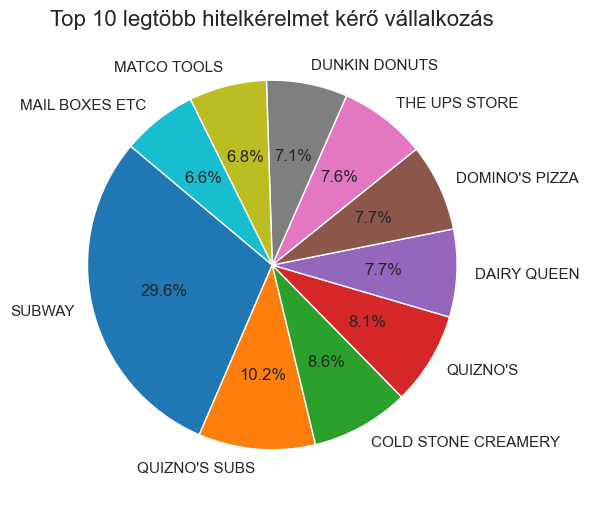

In [40]:
top_10 = df_sba['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
colors = sns.color_palette("tab10")
top_10.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Top 10 legtöbb hitelkérelmet kérő vállalkozás', fontsize=16)
plt.ylabel('')
plt.show()

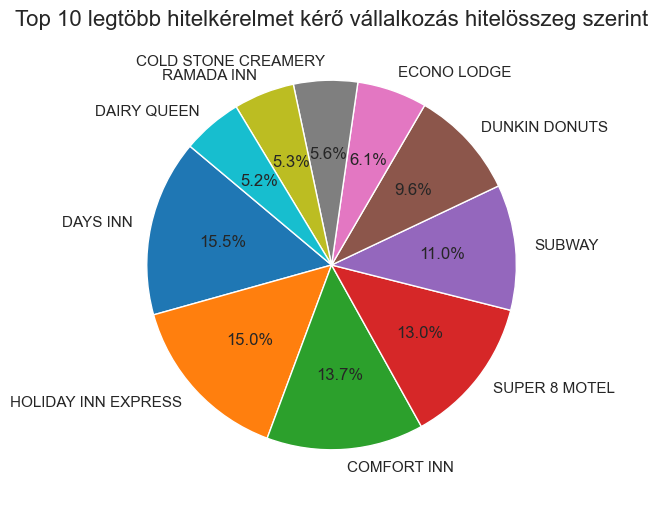

In [41]:
top_10_by_loan_amount = df_sba.groupby('Name')['GrAppv'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_by_loan_amount.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 legtöbb hitelkérelmet kérő vállalkozás hitelösszeg szerint', fontsize=16)
plt.ylabel('')
plt.show()

#### Átlagos hitelösszeg vizsgálata

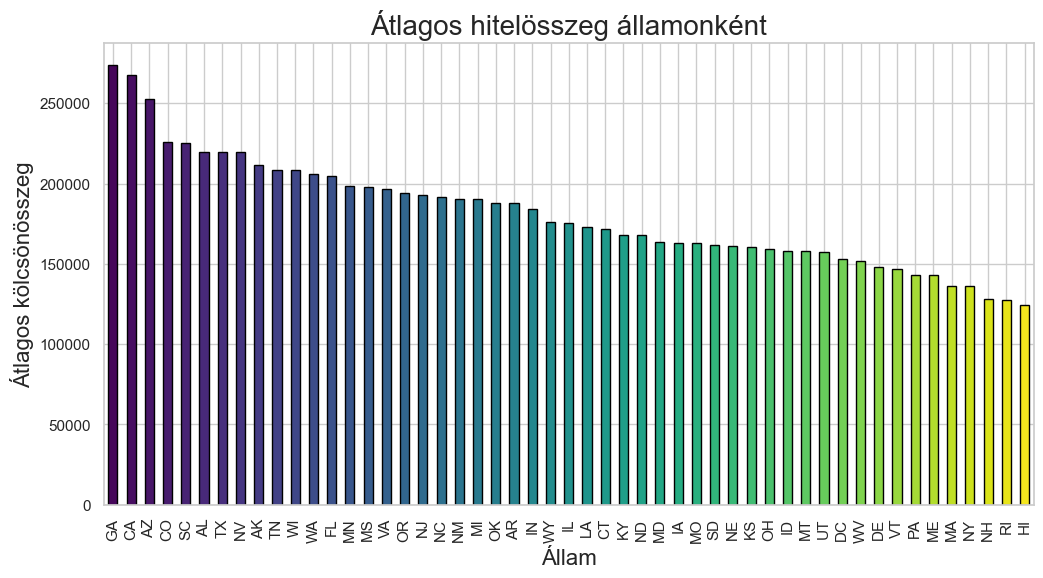

In [190]:
avg_loan_by_state = df_sba.groupby('State')['GrAppv'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_loan_by_state.plot(kind='bar',edgecolor='black',  color=sns.color_palette("viridis", n_colors=len(avg_loan_by_state)))
plt.title('Átlagos hitelösszeg államonként', fontsize=20)
plt.xlabel('Állam', fontsize=16)
plt.ylabel('Átlagos kölcsönösszeg', fontsize=16)
plt.xticks(rotation=90, ha='center')
plt.show()

In [46]:
from scipy.stats import ttest_ind
new_exist_grappv = df_sba[df_sba['NewExist'] == 2]['GrAppv']
old_exist_grappv = df_sba[df_sba['NewExist'] == 1]['GrAppv']
t_statistic, p_value = ttest_ind(new_exist_grappv, old_exist_grappv)
print(f"T-próba statisztika: {t_statistic:.2f}")
print(f"P érték: {p_value:.10f}")

T-próba statisztika: -61.86
P érték: 0.0000000000


###### Elutasítjuk a null hipotézist 95% megbízhatósági szinten, van szignifikáns különbség a csoportok között.

Text(0, 0.5, 'Hitelkérelmek átlaga')

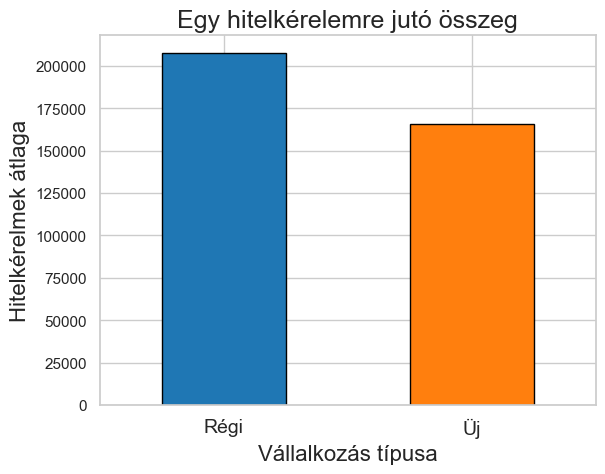

In [143]:
df_sba.groupby('NewExist')['GrAppv'].mean().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Egy hitelkérelemre jutó összeg', fontsize=18)
plt.xlabel('Vállalkozás típusa', fontsize=16)
plt.xticks([0, 1], ['Régi', 'Üj'])
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.ylabel('Hitelkérelmek átlaga', fontsize=16)

In [52]:
df_sba.groupby('NAICS')['GrAppv'].mean().sort_values(ascending=False)

NAICS
55    334395.274510
32    286206.481635
33    273931.994386
11    267277.421669
21    263566.102222
72    257017.644239
42    240060.377527
31    233872.124055
0     230065.018560
71    220926.472458
62    207584.049723
44    193951.615168
49    178945.743614
22    165991.837754
53    165560.773060
81    161796.494930
51    146278.391428
54    141369.875373
61    137186.165987
52    136905.331499
23    135212.848898
48    114611.366572
45    111725.537659
56    104984.316677
92     89427.821101
Name: GrAppv, dtype: float64

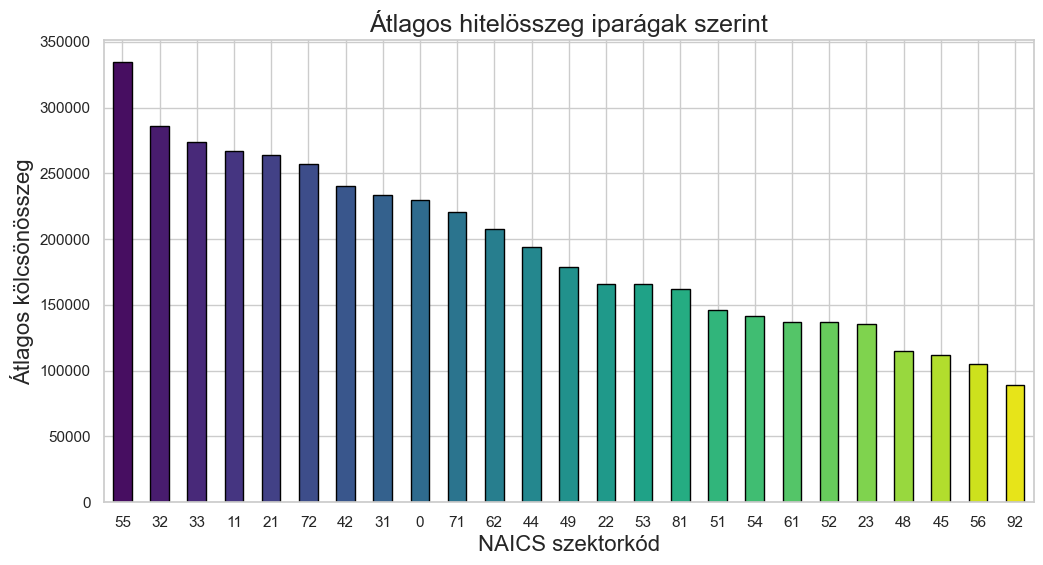

In [189]:
avg_loan_by_naics = df_sba.groupby('NAICS')['GrAppv'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_loan_by_naics.plot(kind='bar',edgecolor='black', color=sns.color_palette("viridis", n_colors=len(avg_loan_by_naics)))
plt.title('Átlagos hitelösszeg iparágak szerint', fontsize=18)
plt.xlabel('NAICS szektorkód', fontsize=16)
plt.ylabel('Átlagos kölcsönösszeg', fontsize=16)
plt.xticks(rotation=0, ha='center')
plt.show()

In [57]:
from scipy.stats import ttest_ind
rural_grappv = df_sba[df_sba['UrbanRural'] == 2]['GrAppv']
urban_grappv = df_sba[df_sba['UrbanRural'] == 1]['GrAppv']
t_statistic, p_value = ttest_ind(rural_grappv, urban_grappv)
print(f"T-próba statisztika: {t_statistic:.2f}")
print(f"P érték: {p_value:.10f}")

T-próba statisztika: 3.14
P érték: 0.0017029345


###### Elutasítjuk a null hipotézist 95% megbízhatósági szinten, van szignifikáns különbség a csoportok között.

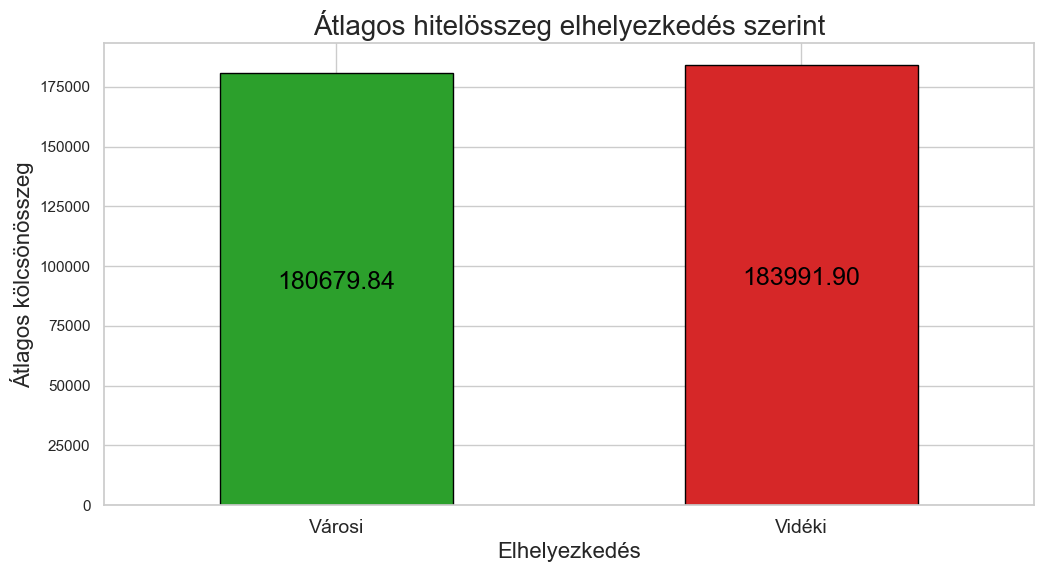

In [100]:
avg_loan_by_urb = df_sba[df_sba['UrbanRural']!=0].groupby('UrbanRural')['GrAppv'].mean().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
avg_loan_by_urb.plot(kind='bar', color=[colors[2], colors[3]], edgecolor='black')
plt.title('Átlagos hitelösszeg elhelyezkedés szerint', fontsize=20)
plt.xlabel('Elhelyezkedés', fontsize=16)
plt.ylabel('Átlagos kölcsönösszeg', fontsize=16)
plt.xticks([0,1],['Városi','Vidéki'], fontsize=14)
plt.xticks(rotation=0, ha='center')
for i, value in enumerate(avg_loan_by_urb):
    plt.text(i, value/2, f'{value:.2f}', ha='center', fontsize=18, color='black')
plt.show()

#### Alkalmazottak számának vizsgálata

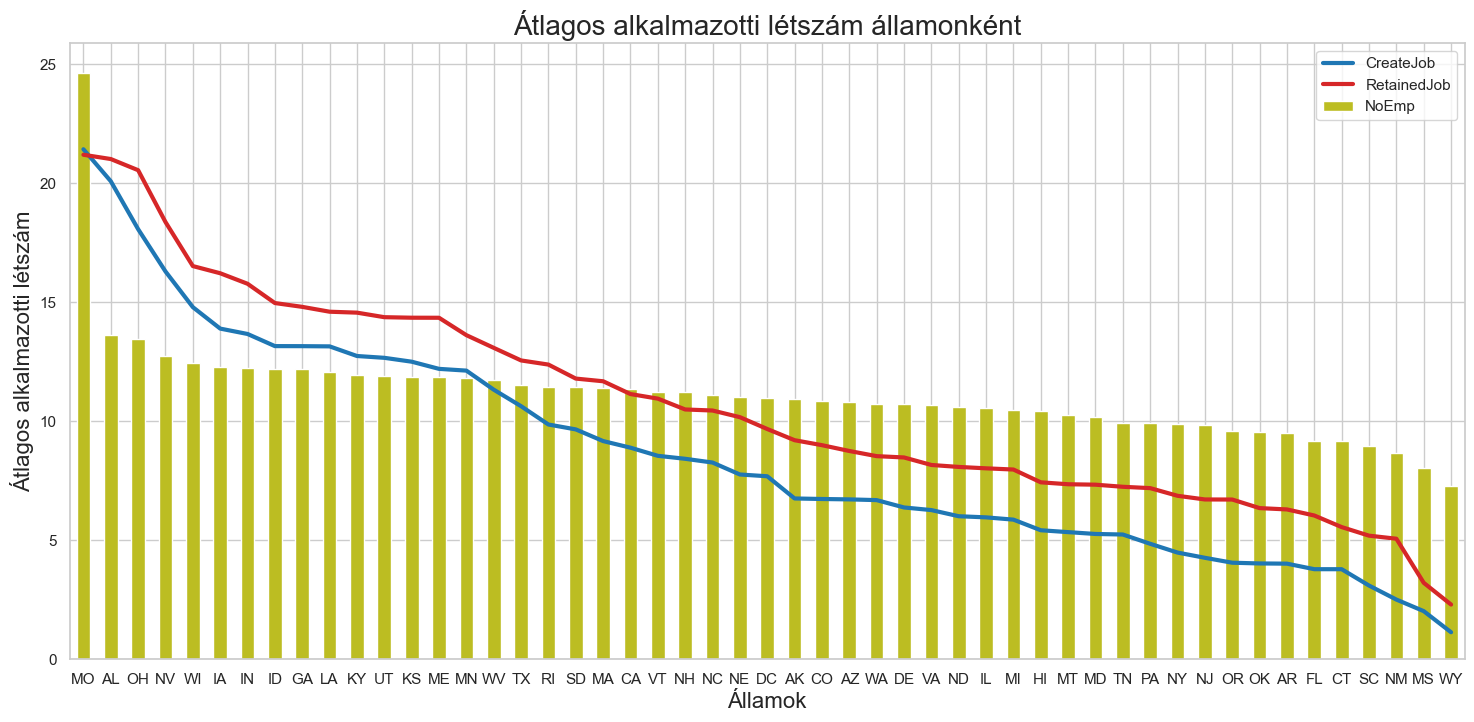

In [80]:
noemp_by_state = df_sba.groupby('State')['NoEmp'].mean().sort_values(ascending=False)
plt.figure(figsize=(18, 8))
noemp_by_state.plot(kind='bar', color=colors[8])
plt.title('Átlagos alkalmazotti létszám államonként', fontsize=20)
plt.ylabel('Átlagos alkalmazotti létszám', fontsize=16)


createjob_by_state = df_sba.groupby('State')['CreateJob'].mean().sort_values(ascending=False)
createjob_by_state.plot(kind='line', color=colors[0], linewidth=3)
retainedjob_by_state = df_sba.groupby('State')['RetainedJob'].mean().sort_values(ascending=False)
retainedjob_by_state.plot(kind='line', color=colors[3], linewidth=3)
plt.xticks(rotation=0, ha='center')
plt.xlabel('Államok', fontsize=16)
plt.legend()
plt.show()

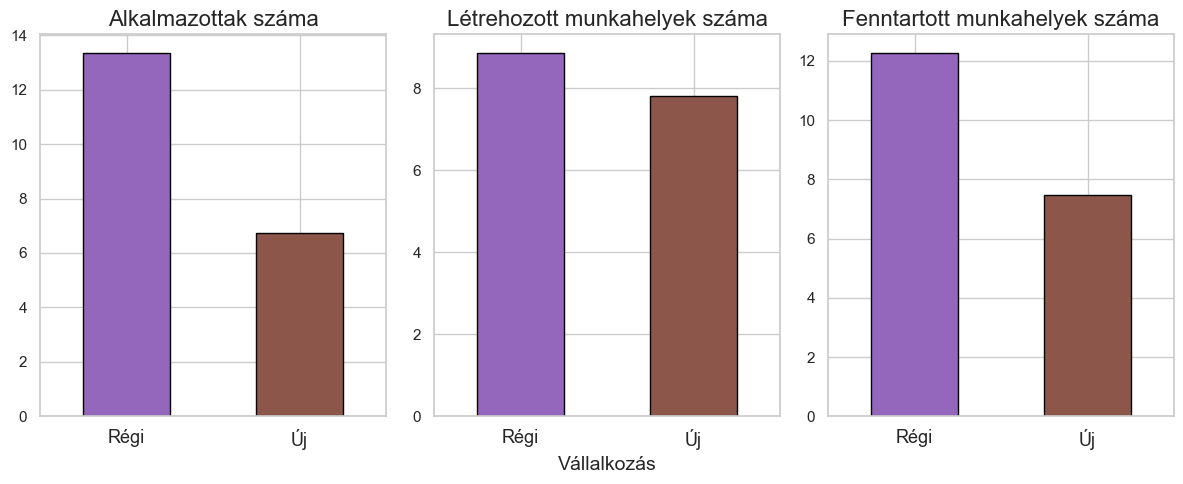

In [102]:
noemp_avg = df_sba.groupby('NewExist')['NoEmp'].mean()
createjob_avg = df_sba.groupby('NewExist')['CreateJob'].mean()
retainedjob_avg = df_sba.groupby('NewExist')['RetainedJob'].mean()

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
noemp_avg.plot(kind='bar', color=[colors[4], colors[5]], edgecolor='black')
plt.title('Alkalmazottak száma', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Régi', 'Új'])
plt.xticks(rotation=0, ha='center', fontsize=13)
#plt.ylabel('Átlagos alkalmazottak száma')

plt.subplot(1, 3, 2)
createjob_avg.plot(kind='bar', color=[colors[4], colors[5]], edgecolor='black')
plt.title('Létrehozott munkahelyek száma', fontsize=16)
plt.xlabel('Vállalkozás', fontsize=14)
plt.xticks([0, 1], ['Régi', 'Új'])
plt.xticks(rotation=0, ha='center', fontsize=13)
#plt.ylabel('Átlagos létrehozott munkahelyek száma')

plt.subplot(1, 3, 3)
retainedjob_avg.plot(kind='bar', color=[colors[4], colors[5]], edgecolor='black')
plt.title('Fenntartott munkahelyek száma', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Régi', 'Új'])
plt.xticks(rotation=0, ha='center', fontsize=13)
#plt.ylabel('Átlagos fenntartott munkahelyek száma')

plt.tight_layout()
plt.show()

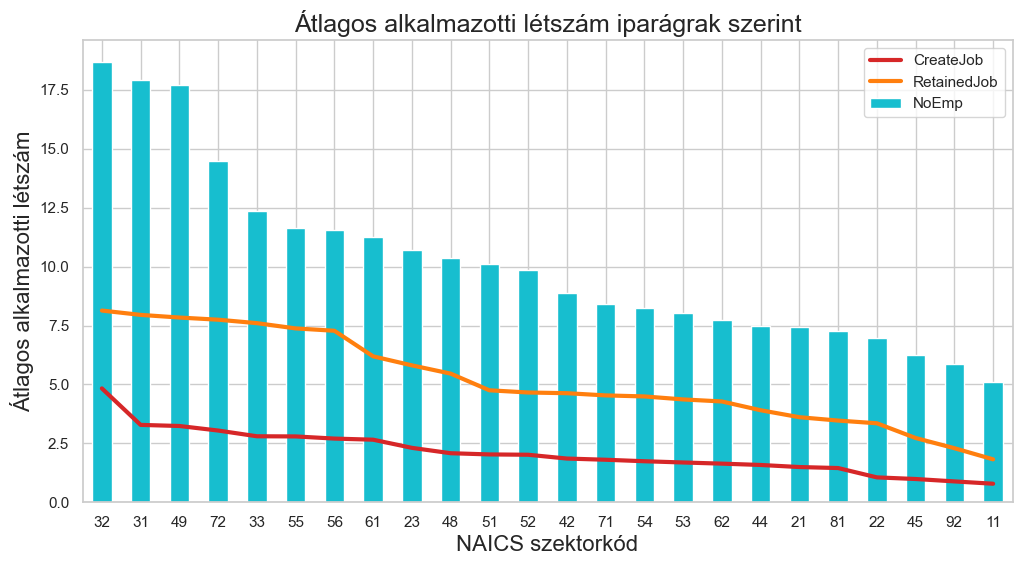

In [141]:
noemp_by_naics = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['NoEmp'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
noemp_by_naics.plot(kind='bar', color=colors[9])
plt.title('Átlagos alkalmazotti létszám iparágrak szerint', fontsize=18)
plt.ylabel('Átlagos alkalmazotti létszám', fontsize=16)
plt.xticks(rotation=45, ha='center')

createjob_by_naics = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['CreateJob'].mean().sort_values(ascending=False)
createjob_by_naics.plot(kind='line', color=colors[3], linewidth=3)
retainedjob_by_naics = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['RetainedJob'].mean().sort_values(ascending=False)
retainedjob_by_naics.plot(kind='line', color=colors[1], linewidth=3)
plt.xlabel('NAICS szektorkód', fontsize=16)
plt.legend()
plt.show()

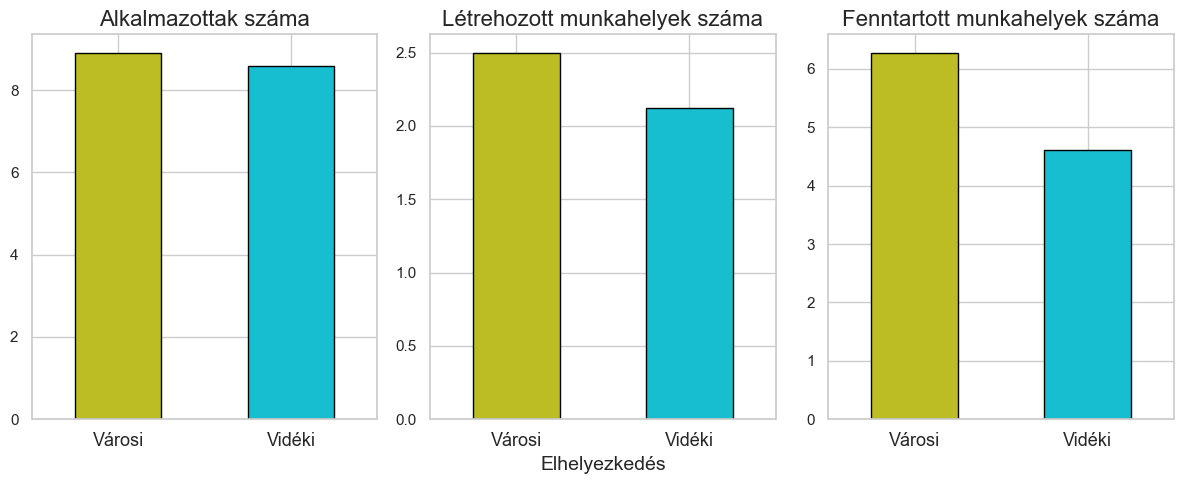

In [105]:
noemp_avg_by_urb = df_sba[df_sba['UrbanRural']!=0].groupby('UrbanRural')['NoEmp'].mean()
createjob_avg_by_urb = df_sba[df_sba['UrbanRural']!=0].groupby('UrbanRural')['CreateJob'].mean()
retainedjob_avg_by_urb = df_sba[df_sba['UrbanRural']!=0].groupby('UrbanRural')['RetainedJob'].mean()

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
noemp_avg_by_urb.plot(kind='bar', color=[colors[8], colors[9]], edgecolor='black')
plt.title('Alkalmazottak száma', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Városi', 'Vidéki'])
plt.xticks(rotation=0, ha='center', fontsize=13)

plt.subplot(1, 3, 2)
createjob_avg_by_urb.plot(kind='bar', color=[colors[8], colors[9]], edgecolor='black')
plt.title('Létrehozott munkahelyek száma', fontsize=16)
plt.xlabel('Elhelyezkedés', fontsize=14)
plt.xticks([0, 1], ['Városi', 'Vidéki'])
plt.xticks(rotation=0, ha='center', fontsize=13)

plt.subplot(1, 3, 3)
retainedjob_avg_by_urb.plot(kind='bar', color=[colors[8], colors[9]], edgecolor='black')
plt.title('Fenntartott munkahelyek száma', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Városi', 'Vidéki'])
plt.xticks(rotation=0, ha='center', fontsize=13)

plt.tight_layout()
plt.show()

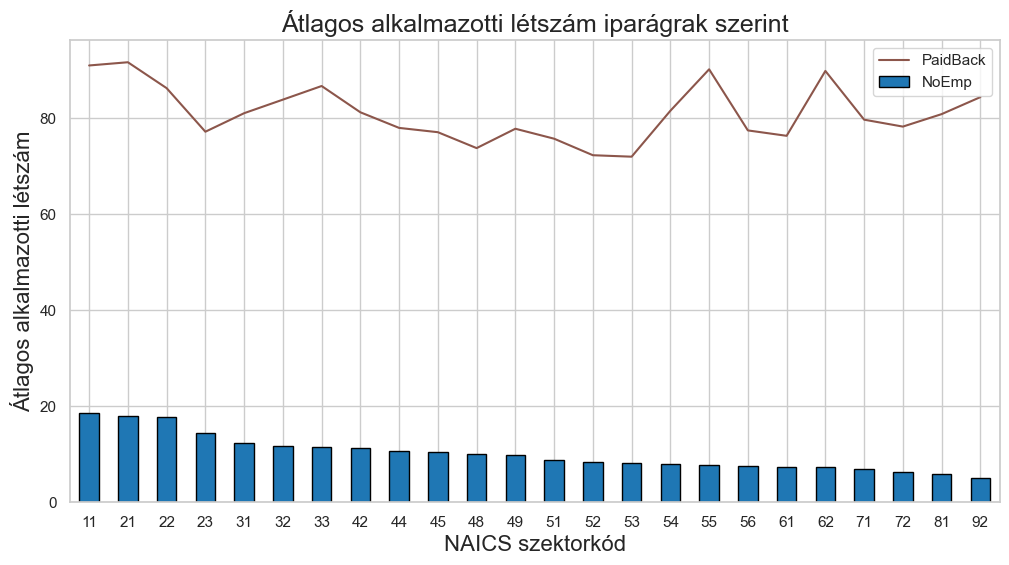

In [188]:
noemp_by_naics = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['NoEmp'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
noemp_by_naics.plot(kind='bar', color=colors[0], edgecolor='black')
plt.title('Átlagos alkalmazotti létszám iparágrak szerint', fontsize=18)
plt.ylabel('Átlagos alkalmazotti létszám',fontsize=16)
plt.xticks(rotation=0, ha='center')

paidback_naics = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['PaidBack'].mean() * 100
paidback_naics.plot(kind='line', color=colors[5])
plt.xlabel('NAICS szektorkód',fontsize=16)
plt.legend()
plt.show()

#### Visszafizetések vizsgálata

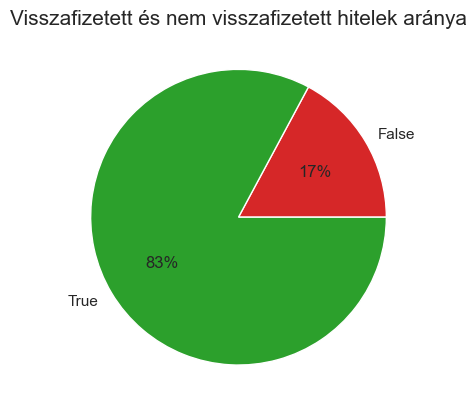

In [139]:
df_sba.groupby('PaidBack').size().plot(kind='pie', autopct='%1.f%%', colors=[colors[3], colors[2]])
plt.title('Visszafizetett és nem visszafizetett hitelek aránya',fontsize=15)
plt.show()

In [112]:
(df_sba.groupby('State')['PaidBack'].mean() * 100).sort_values(ascending=False)

State
MT    93.151167
WY    93.027457
VT    92.655898
ND    92.327117
SD    92.152778
ME    90.372294
NH    89.433737
NM    89.289392
NE    88.731487
AK    88.523891
IA    88.461209
MN    88.370436
RI    88.122186
WI    87.907841
MA    87.274152
KS    87.066190
WA    86.647752
CT    86.349667
ID    85.928045
PA    85.445367
OR    85.000000
MO    84.864541
HI    84.711922
OK    84.556622
MS    84.217542
WV    83.744920
OH    83.646611
AL    83.431085
AR    83.252191
IN    82.486827
UT    82.463201
DE    82.431786
CA    82.256869
CO    82.152231
LA    81.886994
VA    81.875842
NC    81.511687
TX    81.385160
MD    80.872773
KY    80.819892
SC    80.727612
NY    80.481058
NJ    80.471263
AZ    79.649903
TN    79.368584
MI    77.501635
IL    77.409344
NV    77.399820
GA    77.256183
DC    76.357827
FL    74.200878
Name: PaidBack, dtype: float64

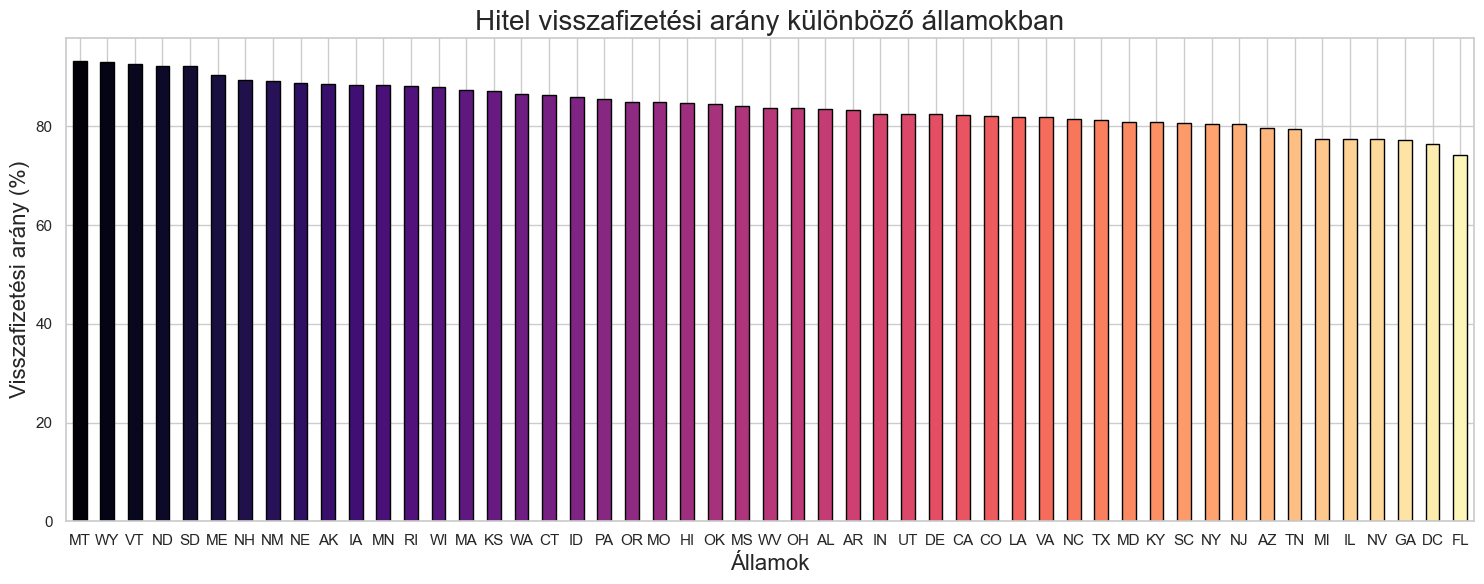

In [187]:
paidback_rates = df_sba.groupby('State')['PaidBack'].mean() * 100
plt.figure(figsize=(15, 6))
paidback_rates.sort_values(ascending=False).plot(kind='bar',edgecolor='black', color=sns.color_palette("magma", n_colors=len(paidback_rates)))
plt.title('Hitel visszafizetési arány különböző államokban', fontsize=20)
plt.xlabel('Államok',fontsize=16)
plt.ylabel('Visszafizetési arány (%)', fontsize=16)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [116]:
(df_sba[df_sba.NAICS!='0'].groupby('NAICS')['PaidBack'].mean() * 100).sort_values(ascending=False)

NAICS
21    91.666667
11    90.995907
55    90.196078
62    89.857853
33    86.716928
22    86.271451
92    84.403670
32    83.878222
54    81.559181
42    81.240363
31    81.053279
81    80.860154
71    79.703390
72    78.261728
44    77.988812
49    77.814570
56    77.466063
23    77.194857
45    77.093536
61    76.341105
51    75.739537
48    73.779385
52    72.298041
53    71.991448
Name: PaidBack, dtype: float64

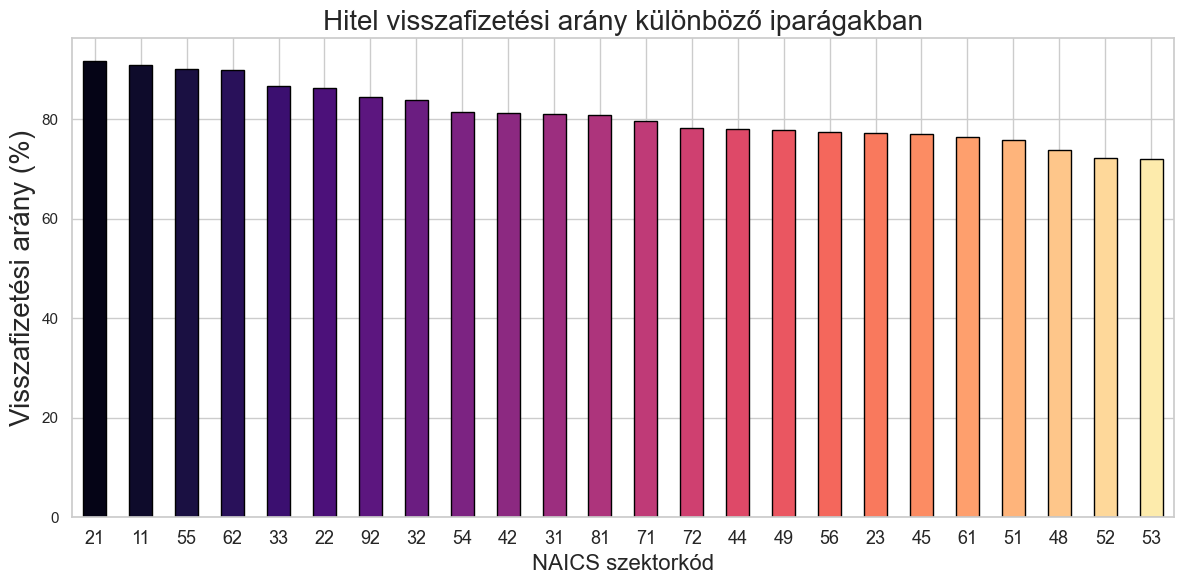

In [186]:
paidback_naics = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['PaidBack'].mean() * 100
plt.figure(figsize=(12, 6))
paidback_naics.sort_values(ascending=False).plot(kind='bar', edgecolor='black', color=sns.color_palette("magma", n_colors=len(paidback_naics)))
plt.title('Hitel visszafizetési arány különböző iparágakban', fontsize=20)
plt.xlabel('NAICS szektorkód', fontsize=16)
plt.ylabel('Visszafizetési arány (%)', fontsize=20)
plt.xticks(rotation=0, ha='center', fontsize=13)
plt.tight_layout()
plt.show()

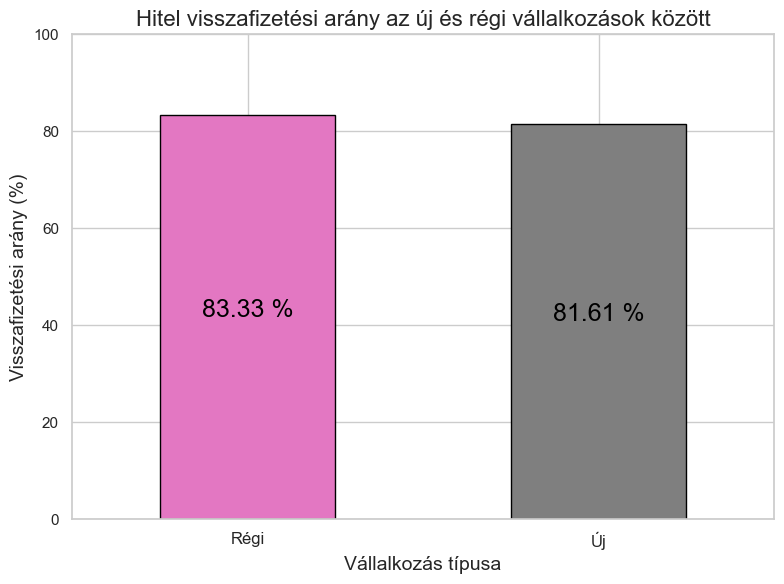

In [137]:
paidback_rates = df_sba.groupby('NewExist')['PaidBack'].mean() * 100
plt.figure(figsize=(8, 6))
paidback_rates.plot(kind='bar', color=[colors[6],colors[7]], edgecolor='black')
plt.title('Hitel visszafizetési arány az új és régi vállalkozások között', fontsize=16)
plt.xlabel('Vállalkozás típusa', fontsize=14)
plt.ylabel('Visszafizetési arány (%)', fontsize=14)
plt.xticks([0, 1], ['Régi', 'Új'], rotation=0, fontsize=12)
plt.ylim(0, 100)
for i, value in enumerate(paidback_rates):
    plt.text(i, value/2, f'{value:.2f} %', ha='center', fontsize=18, color='black')
plt.tight_layout()
plt.show()

In [130]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [131]:
df_sba[df_sba.UrbanRural!=0].groupby('UrbanRural')['PaidBack'].mean() * 100

UrbanRural
1    76.161439
2    81.462874
Name: PaidBack, dtype: float64

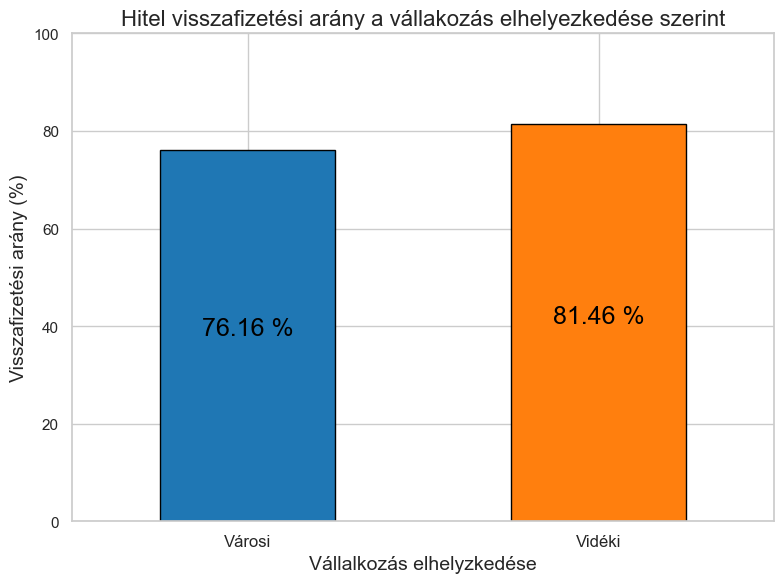

In [144]:
paidback_rates2 = df_sba[df_sba.UrbanRural!=0].groupby('UrbanRural')['PaidBack'].mean() * 100
plt.figure(figsize=(8, 6))
paidback_rates2.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Hitel visszafizetési arány a vállakozás elhelyezkedése szerint', fontsize=16)
plt.xlabel('Vállalkozás elhelyzkedése', fontsize=14)
plt.ylabel('Visszafizetési arány (%)', fontsize=14)
plt.xticks([0, 1], ['Városi', 'Vidéki'], rotation=0, fontsize=12)
plt.ylim(0, 100)
for i, value in enumerate(paidback_rates2):
    plt.text(i, value/2, f'{value:.2f} %', ha='center', fontsize=18, color='black')
plt.tight_layout()
plt.show()

#### Időbeli alakulás vizsgálata

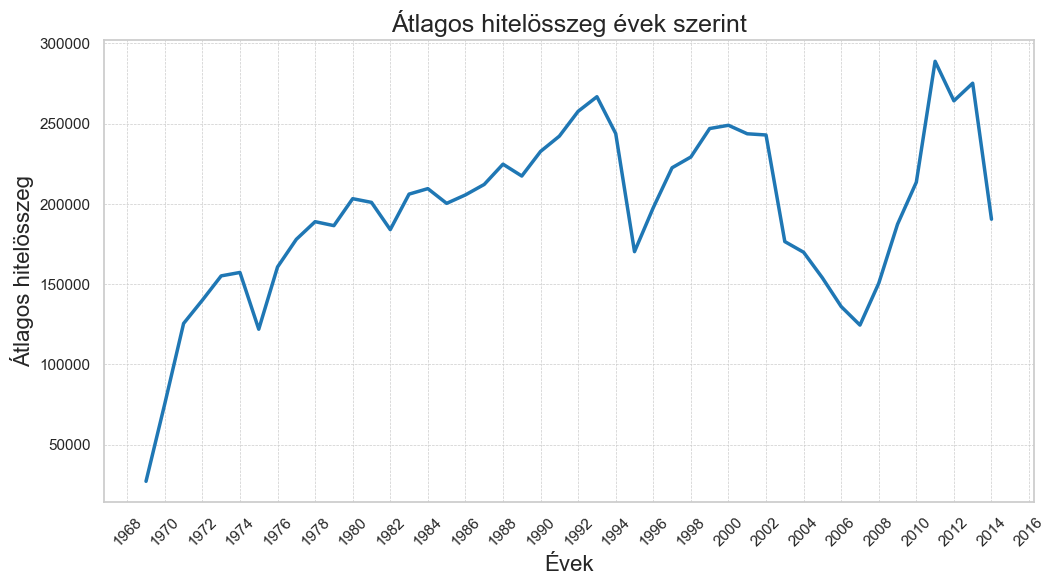

In [147]:
plt.figure(figsize=(12, 6))
df_sba.groupby('ApprovalFY')['GrAppv'].mean().plot(kind='line', color=colors, linewidth=2.5)
plt.title('Átlagos hitelösszeg évek szerint', fontsize=18)
plt.xlabel('Évek',fontsize=16)
plt.ylabel('Átlagos hitelösszeg',fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=30)
plt.locator_params(axis='y', nbins=10)
plt.show()

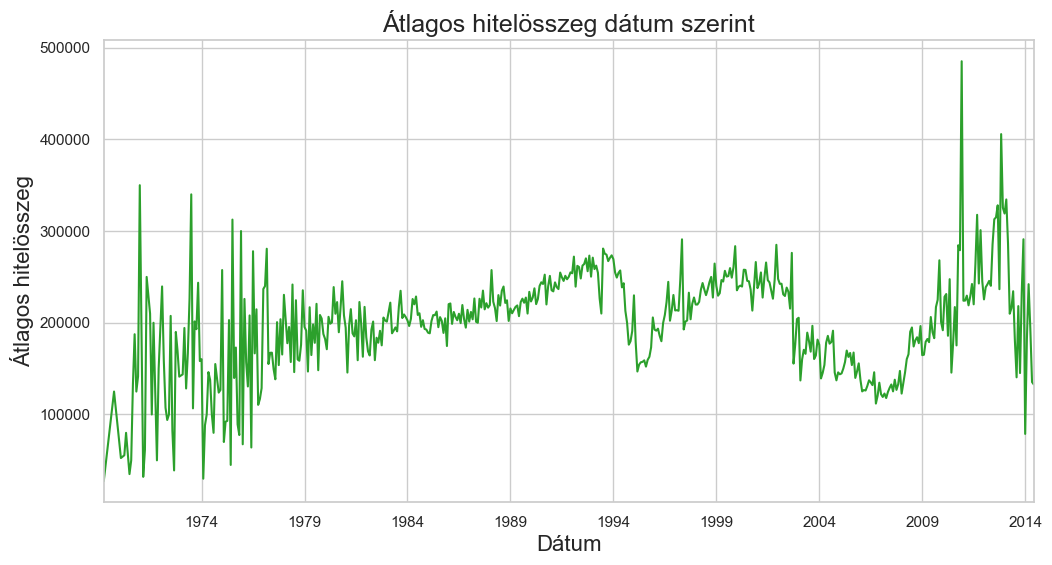

In [150]:
df_sba['ApprYearMonth'] = df_sba['ApprovalDate'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df_sba.groupby('ApprYearMonth')['GrAppv'].mean().plot(color=colors[2])
plt.title('Átlagos hitelösszeg dátum szerint', fontsize=18)
plt.xlabel('Dátum', fontsize=16)
plt.ylabel('Átlagos hitelösszeg', fontsize=16)
plt.show()

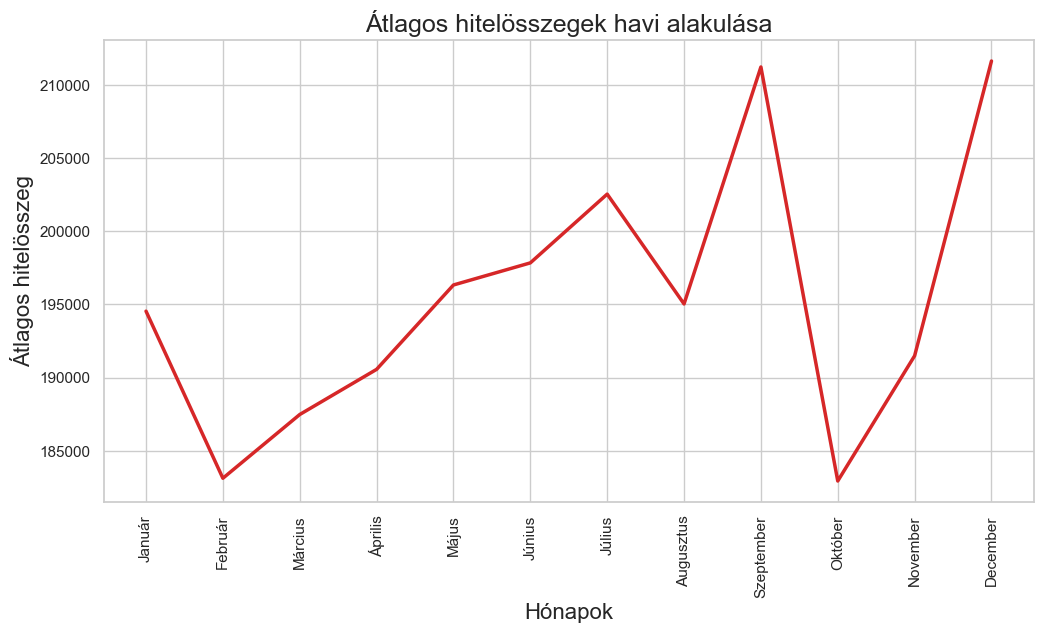

In [151]:
plt.figure(figsize=(12, 6))
df_sba['Month'] = df_sba['ApprovalDate'].dt.month
df_sba.groupby('Month')['GrAppv'].mean().plot(linewidth=2.5, color=colors[3])
plt.title('Átlagos hitelösszegek havi alakulása', fontsize=18)
plt.xlabel('Hónapok', fontsize=16)
plt.ylabel('Átlagos hitelösszeg', fontsize=16)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Január', 'Február', 'Március', 'Április', 'Május', 'Június', 'Július', 'Augusztus', 'Szeptember', 'Október', 'November', 'December'])
plt.xticks(rotation=90)
plt.show()

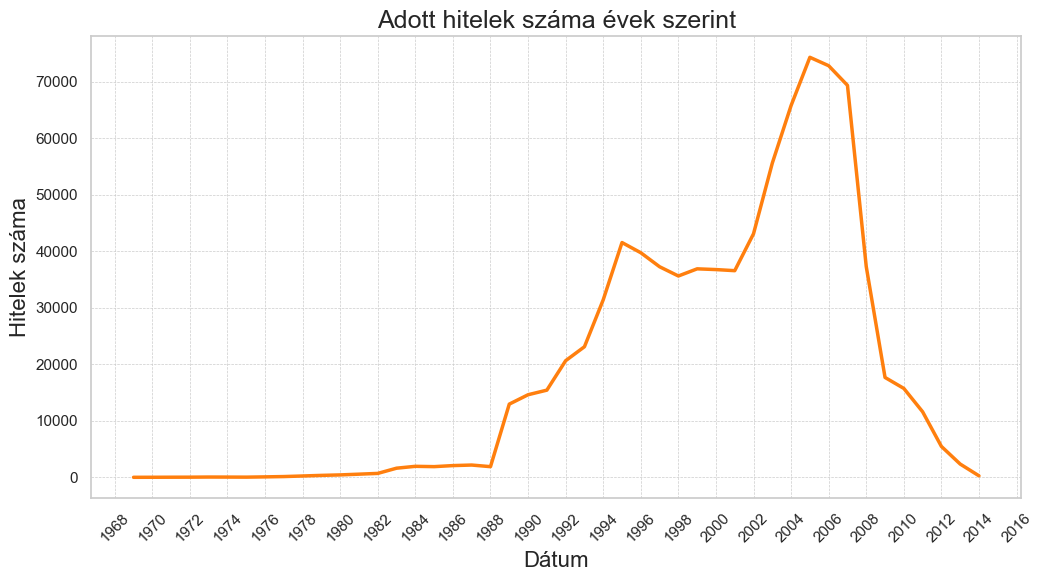

In [155]:
plt.figure(figsize=(12, 6))
df_sba.groupby('ApprovalFY')['GrAppv'].count().plot(kind='line', linewidth=2.5, color=colors[1])
plt.title('Adott hitelek száma évek szerint', fontsize=18)
plt.xlabel('Dátum', fontsize=16)
plt.ylabel('Hitelek száma', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=30)
plt.locator_params(axis='y', nbins=10)
plt.show()

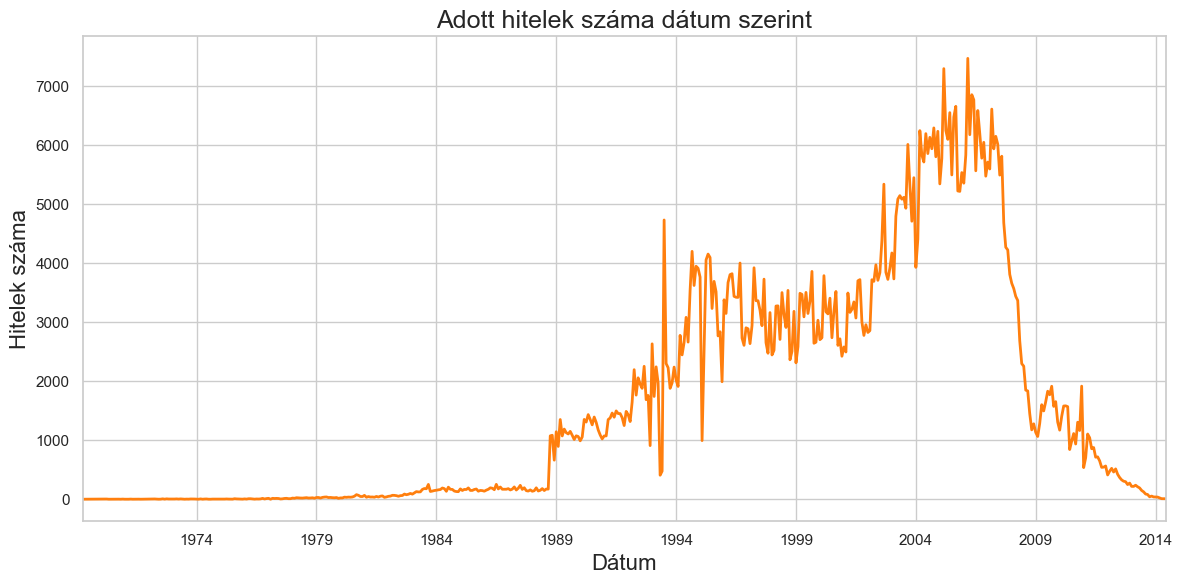

In [156]:
plt.figure(figsize=(12, 6))
df_sba.groupby('ApprYearMonth')['GrAppv'].count().plot(linewidth=2, color=colors[1])
plt.title('Adott hitelek száma dátum szerint', fontsize=18)
plt.xlabel('Dátum', fontsize=16)
plt.ylabel('Hitelek száma', fontsize=16)
plt.tight_layout()
plt.show()

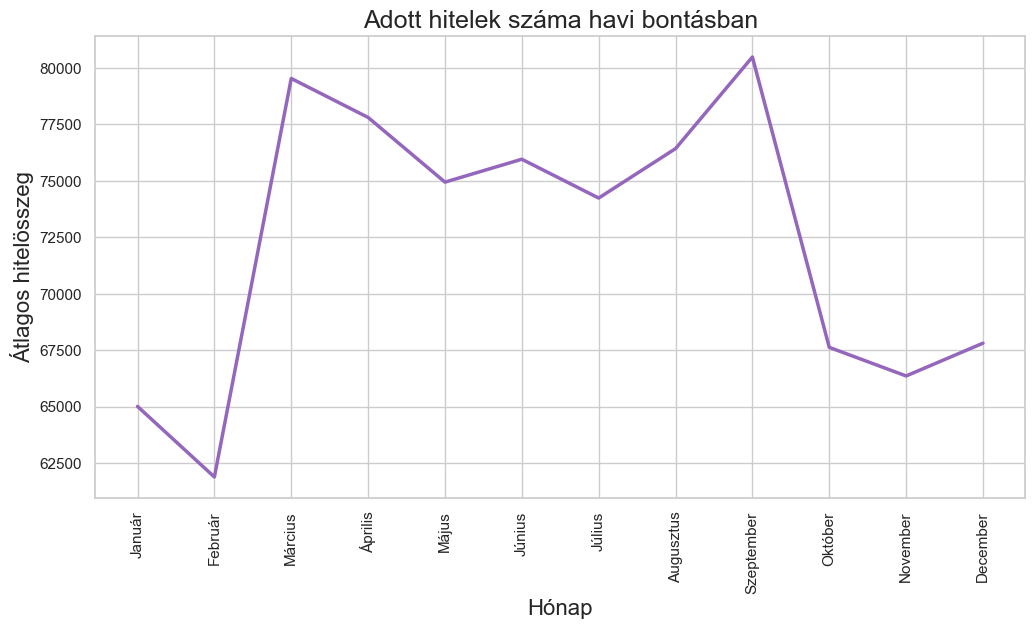

In [157]:
plt.figure(figsize=(12, 6))
df_sba.groupby('Month')['GrAppv'].count().plot(linewidth=2.5, color=colors[4])
plt.title('Adott hitelek száma havi bontásban', fontsize=18)
plt.xlabel('Hónap', fontsize=16)
plt.ylabel('Átlagos hitelösszeg', fontsize=16)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Január', 'Február', 'Március', 'Április', 'Május', 'Június', 'Július', 'Augusztus', 'Szeptember', 'Október', 'November', 'December'])
plt.xticks(rotation=90)
plt.show()

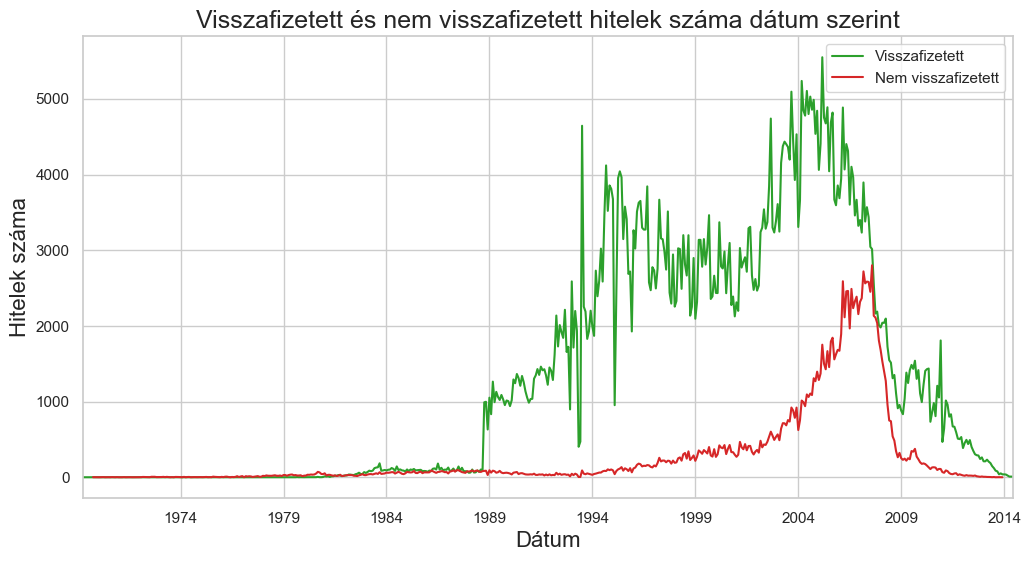

In [161]:
paid_back_counts = df_sba[df_sba['PaidBack'] == True].groupby('ApprYearMonth').size()
not_paid_back_counts = df_sba[df_sba['PaidBack'] == False].groupby('ApprYearMonth').size()
plt.figure(figsize=(12, 6))
paid_back_counts.plot(color=colors[2],label='Visszafizetett')
plt.title('Visszafizetett és nem visszafizetett hitelek száma dátum szerint', fontsize=18)
plt.ylabel('Hitelek száma', fontsize=16)
not_paid_back_counts.plot(color=colors[3],label='Nem visszafizetett')
plt.xlabel('Dátum', fontsize=16)
plt.legend()
plt.show()

Text(0, 0.5, 'Lejárati hitelek átlagos futamideje')

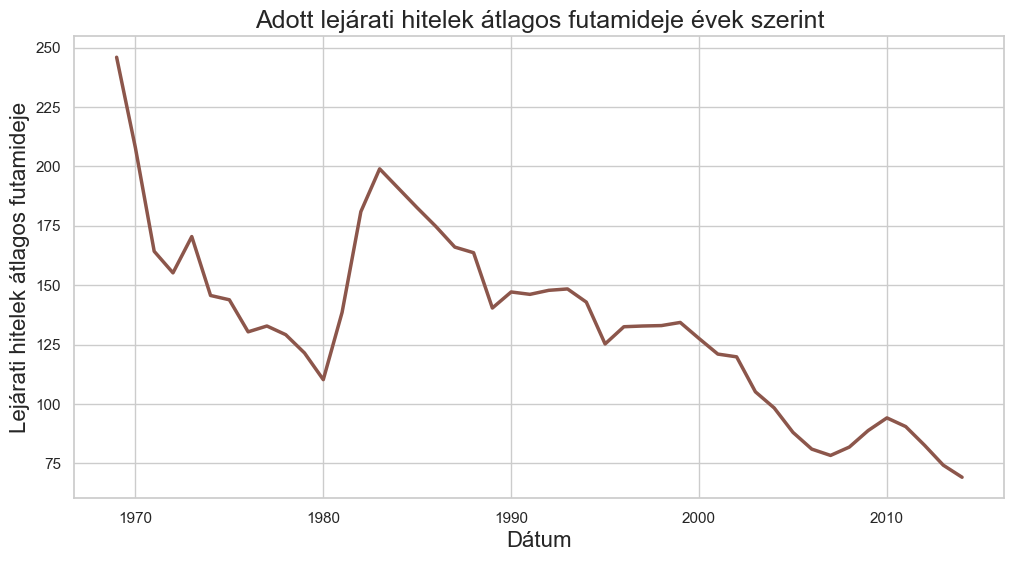

In [163]:
plt.figure(figsize=(12, 6))
df_sba.groupby('ApprovalFY')['Term'].mean().plot(kind='line', linewidth=2.5, color=colors[5])
plt.title('Adott lejárati hitelek átlagos futamideje évek szerint', fontsize=18)
plt.xlabel('Dátum', fontsize=16)
plt.ylabel('Lejárati hitelek átlagos futamideje', fontsize=16)

#### SBA által vállalt összeg

In [164]:
df_sba['SBA_percentage']=(df_sba['SBA_Appv']/df_sba['DisbursementGross']*100).round(2)
df_sba.head()

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,PaidBack,ApprYearMonth,Month,SBA_percentage
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997-02-28,1997,84,...,1999-02-28,60000.0,0.0,0.0,60000.0,48000.0,True,1997-02,2,80.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,1997-02-28,1997,60,...,1997-05-31,40000.0,0.0,0.0,40000.0,32000.0,True,1997-02,2,80.0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997-02-28,1997,180,...,1997-12-31,287000.0,0.0,0.0,287000.0,215250.0,True,1997-02,2,75.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,...,1997-06-30,35000.0,0.0,0.0,35000.0,28000.0,True,1997-02,2,80.0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,...,1997-05-14,229000.0,0.0,0.0,229000.0,229000.0,True,1997-02,2,100.0


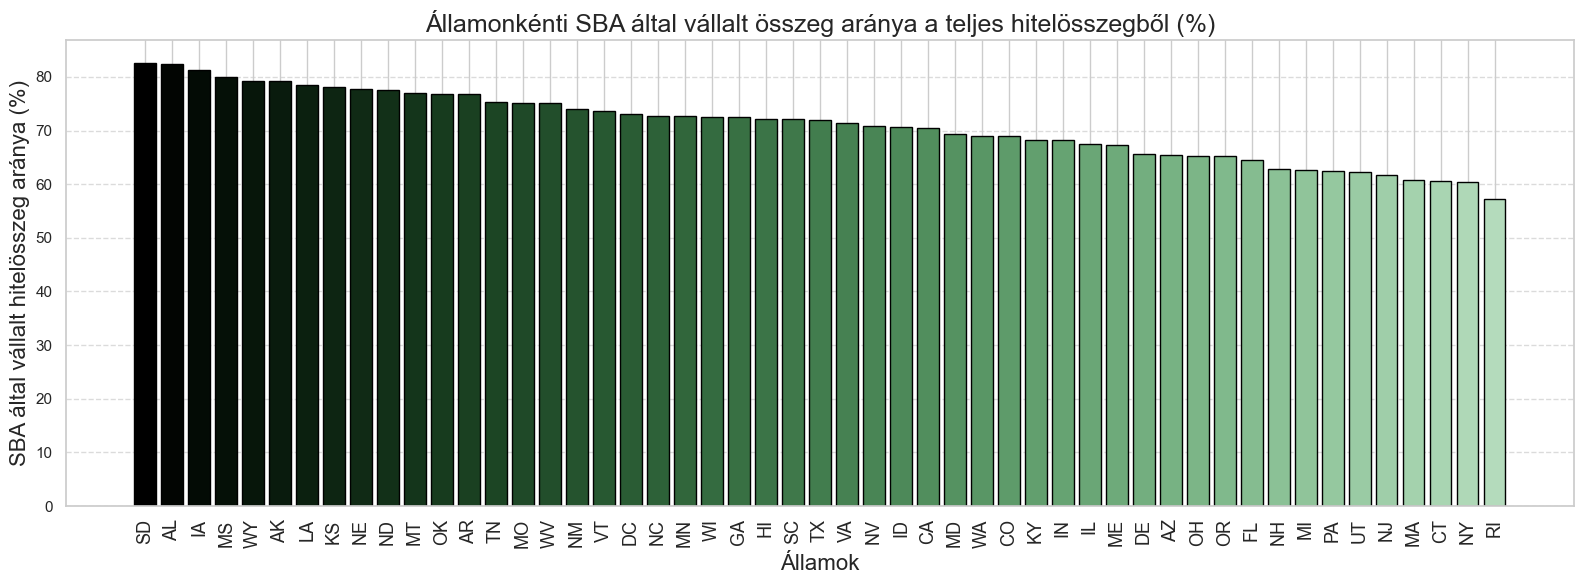

In [185]:
state_sba_percentage = df_sba.groupby('State')['SBA_percentage'].mean().reset_index().sort_values(by='SBA_percentage', ascending=False)

plt.figure(figsize=(16, 6))
plt.bar(state_sba_percentage['State'], state_sba_percentage['SBA_percentage'],edgecolor='black', color=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.80, reverse=True,  n_colors=len(state_sba_percentage)))
plt.xlabel('Államok', fontsize=16)
plt.ylabel('SBA által vállalt hitelösszeg aránya (%)', fontsize=16)
plt.title('Államonkénti SBA által vállalt összeg aránya a teljes hitelösszegből (%)', fontsize=18)
plt.xticks(rotation=90, fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

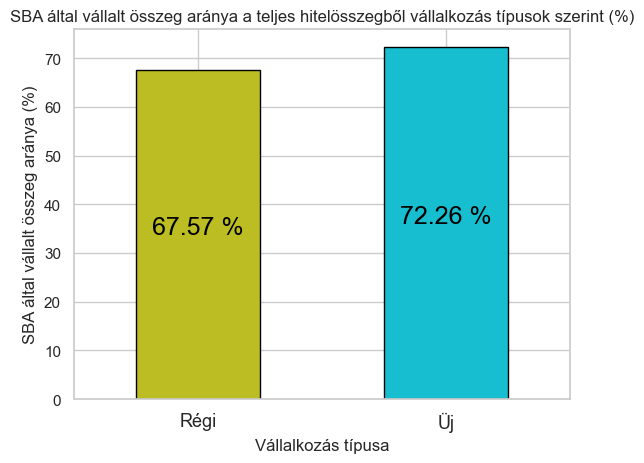

In [180]:
bars=df_sba.groupby('NewExist')['SBA_percentage'].mean()
bars.plot(kind='bar', color=[colors[8], colors[9]], edgecolor='black')
plt.title('SBA által vállalt összeg aránya a teljes hitelösszegből vállalkozás típusok szerint (%)')
plt.xlabel('Vállalkozás típusa', fontsize=12)
plt.xticks([0, 1], ['Régi', 'Üj'], fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('SBA által vállalt összeg aránya (%)')
for i, value in enumerate(bars):
    plt.text(i, value/2, f'{value:.2f} %', ha='center', fontsize=18, color='black')
plt.show()

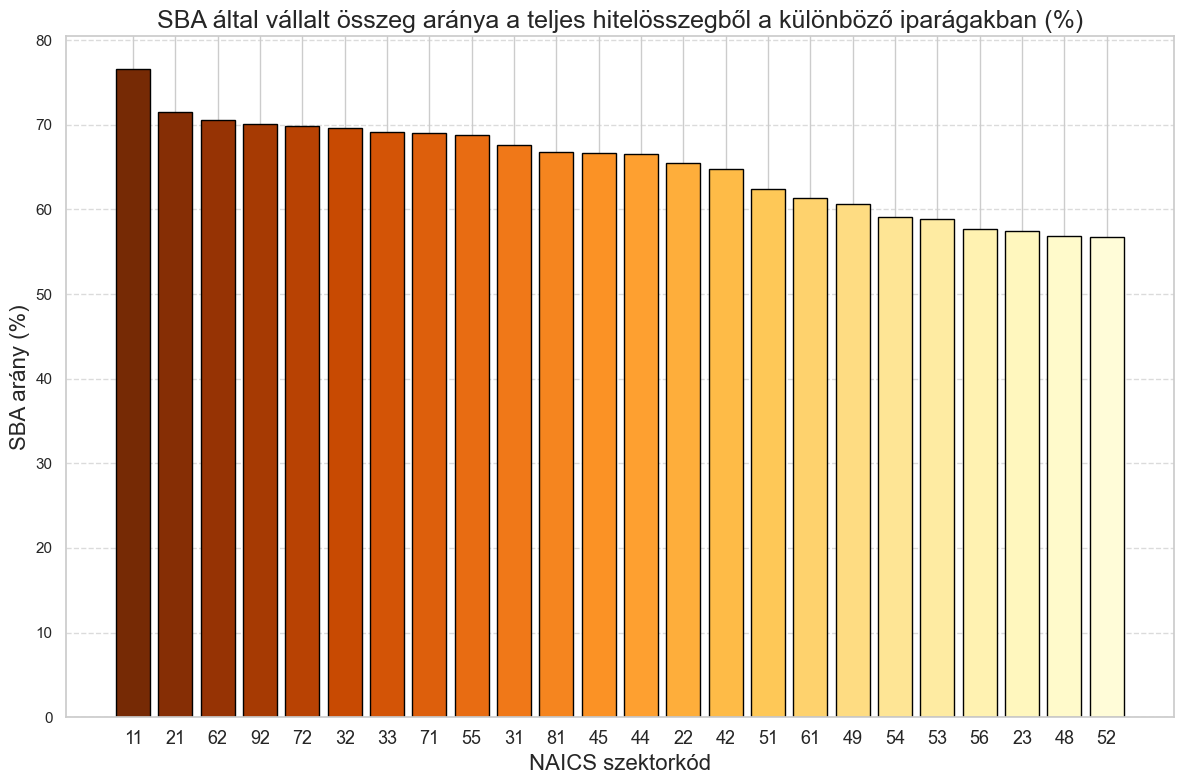

In [184]:
naics_sba_percentage = df_sba[df_sba.NAICS!='0'].groupby('NAICS')['SBA_percentage'].mean().reset_index().sort_values(by='SBA_percentage', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(naics_sba_percentage['NAICS'], naics_sba_percentage['SBA_percentage'],edgecolor='black' ,color=sns.color_palette("YlOrBr", n_colors=len(naics_sba_percentage))[::-1])
plt.xlabel('NAICS szektorkód', fontsize=16)
plt.ylabel('SBA arány (%)', fontsize=16)
plt.title('SBA által vállalt összeg aránya a teljes hitelösszegből a különböző iparágakban (%)', fontsize=18)
plt.xticks(rotation=0, fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

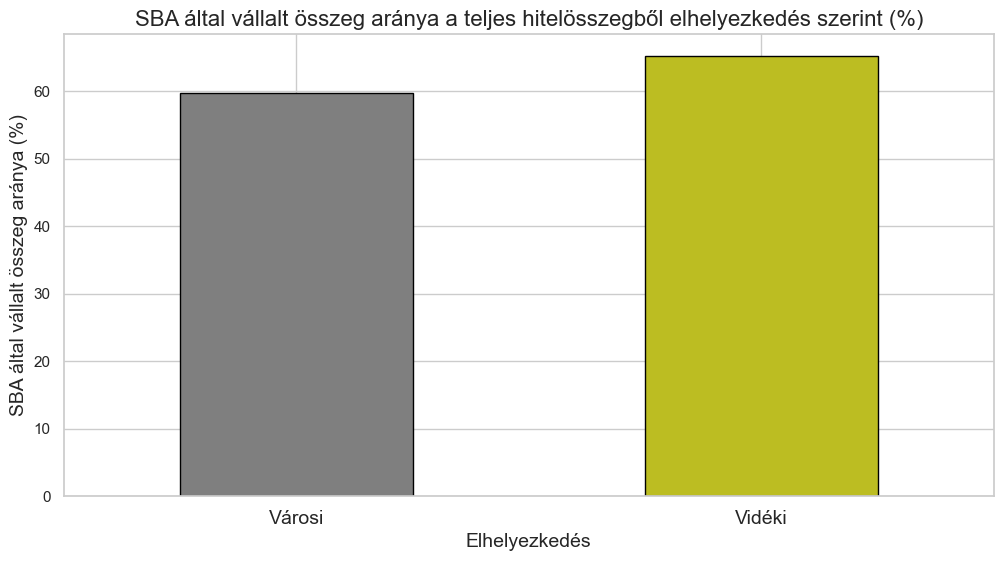

In [193]:
sba_perc_by_urb = df_sba[df_sba['UrbanRural']!=0].groupby('UrbanRural')['SBA_percentage'].mean()
plt.figure(figsize=(12, 6))
sba_perc_by_urb.plot(kind='bar', color=[colors[7], colors[8]], edgecolor='black')
plt.title('SBA által vállalt összeg aránya a teljes hitelösszegből elhelyezkedés szerint (%)', fontsize=16)
plt.xlabel('Elhelyezkedés', fontsize=14)
plt.ylabel('SBA által vállalt összeg aránya (%)', fontsize=14)
plt.xticks([0,1],['Városi','Vidéki'])
plt.xticks(rotation=0, fontsize=14)
plt.show()

#### Változók közi kapcsolatok

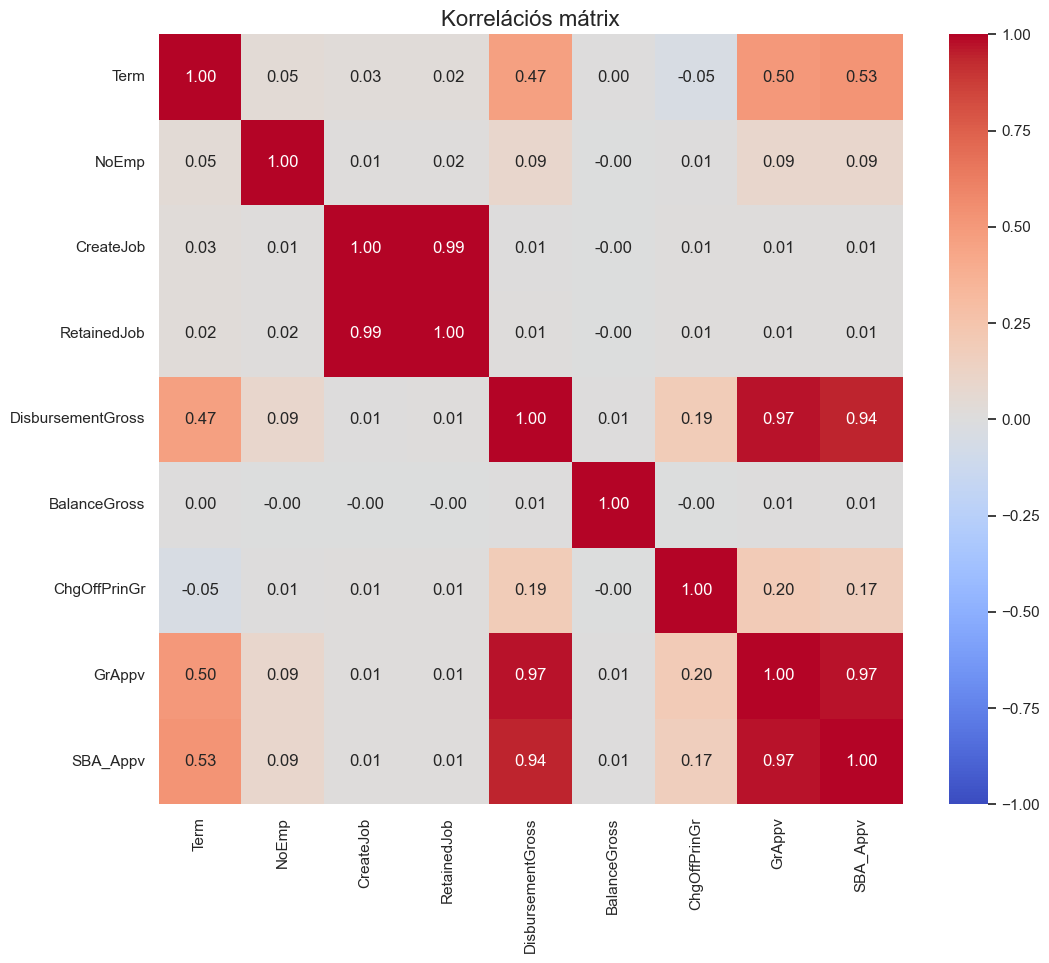

In [196]:
import seaborn as sns

selected_columns = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr',  'GrAppv', 'SBA_Appv']

correlation_matrix = df_sba[selected_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Korrelációs mátrix', fontsize=16)
plt.show()

In [197]:
from scipy.stats import pointbiserialr
correlation_data = []
continuous_variables = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
binary_variables=['NewExist','RevLineCr','LowDoc','PaidBack']
for binary_variable in binary_variables:
    print(f"{binary_variable}")
    for continuous_variable in continuous_variables:
        correlation_coefficient, p_value = pointbiserialr(df_sba[binary_variable], df_sba[continuous_variable])
        print(f"\t{continuous_variable}: {correlation_coefficient:.2f}, p érték: {p_value:.2f}")
        correlation_data.append({'Binary Variable': binary_variable, 'Continuous Variable': continuous_variable, 'Correlation Coefficient': correlation_coefficient})

print("UrbanRural")
urb_not_null=df_sba[df_sba.UrbanRural!=0]
for continuous_variable in continuous_variables:
        correlation_coefficient, p_value = pointbiserialr(urb_not_null['UrbanRural'], urb_not_null[continuous_variable])
        print(f"\t{continuous_variable}: {correlation_coefficient:.2f}, p érték: {p_value:.2f}")
        correlation_data.append({'Binary Variable': 'UrbanRural', 'Continuous Variable': continuous_variable, 'Correlation Coefficient': correlation_coefficient})

NewExist
	Term: -0.07, p érték: 0.00
	NoEmp: -0.04, p érték: 0.00
	CreateJob: -0.00, p érték: 0.06
	RetainedJob: -0.01, p érték: 0.00
	DisbursementGross: -0.07, p érték: 0.00
	BalanceGross: 0.00, p érték: 0.19
	ChgOffPrinGr: 0.02, p érték: 0.00
	GrAppv: -0.07, p érték: 0.00
	SBA_Appv: -0.06, p érték: 0.00
RevLineCr
	Term: -0.34, p érték: 0.00
	NoEmp: -0.03, p érték: 0.00
	CreateJob: -0.02, p érték: 0.00
	RetainedJob: -0.01, p érték: 0.00
	DisbursementGross: -0.18, p érték: 0.00
	BalanceGross: -0.00, p érték: 0.39
	ChgOffPrinGr: -0.03, p érték: 0.00
	GrAppv: -0.26, p érték: 0.00
	SBA_Appv: -0.28, p érték: 0.00
LowDoc
	Term: -0.11, p érték: 0.00
	NoEmp: -0.02, p érték: 0.00
	CreateJob: -0.01, p érték: 0.00
	RetainedJob: -0.02, p érték: 0.00
	DisbursementGross: -0.18, p érték: 0.00
	BalanceGross: -0.00, p érték: 0.47
	ChgOffPrinGr: -0.05, p érték: 0.00
	GrAppv: -0.17, p érték: 0.00
	SBA_Appv: -0.16, p érték: 0.00
PaidBack
	Term: 0.31, p érték: 0.00
	NoEmp: 0.03, p érték: 0.00
	CreateJob: 

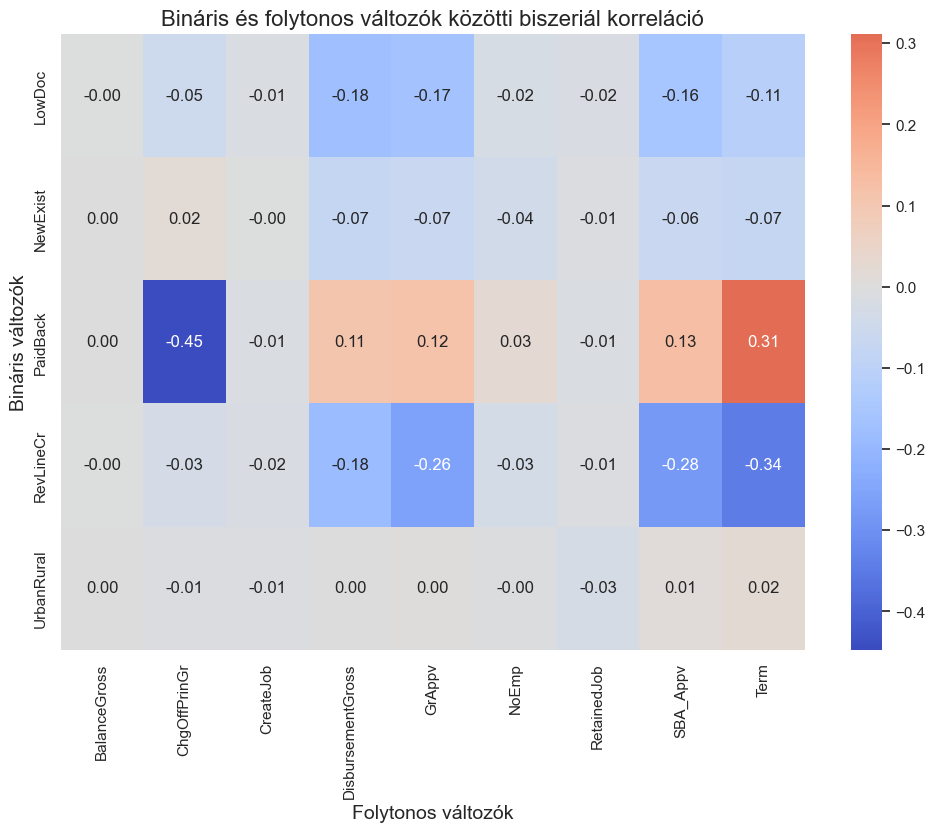

In [199]:
import warnings
warnings.filterwarnings("ignore")

correlation_df = pd.DataFrame(correlation_data)
plt.figure(figsize=(12, 8))
correlation_matrix = correlation_df.pivot(index="Binary Variable", columns="Continuous Variable", values="Correlation Coefficient")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Bináris és folytonos változók közötti biszeriál korreláció", fontsize=16)
plt.xlabel('Folytonos változók', fontsize=14)
plt.ylabel('Bináris változók', fontsize=14)
plt.show()